In [ ]:
#Execute each function individually to get the output. Change the function name in the last block while calling gradient descent function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#z = 20 + x**2 + y**2 - 10 * np.cos(2 * np.pi * x) - 10 * np.cos(2 * np.pi * y)
def f1(v):
    x, y = v
    return 20+x**2 + y**2 - 10 * np.cos(2 * np.pi * x) - 10 * np.cos(2 * np.pi * y)

def grad_f1(v):
    x, y = v
    df_dx = 2 * x + 20 * np.pi * np.sin(2 * np.pi * x)
    df_dy = 2 * y + 20 * np.pi * np.sin(2 * np.pi * y)
    return np.array([df_dx, df_dy])

In [13]:
#z = sin(x) + cos(y) + 0.1 * (x**2 + y**2)
def f2(v):
    x, y = v
    return np.sin(x) + np.cos(y) +  0.1*(x**2 + y**2)

def grad_f2(v):
    x, y = v
    df_dx = np.cos(x) + 2 * x
    df_dy = -np.sin(y) + 2 * y
    return np.array([df_dx, df_dy])

In [14]:
#z=log(1+x**2+y**2)
def f3(v):
    x, y = v
    return np.log(1 + x**2 + y**2)
def grad_f3(v):
    x, y = v
    df_dx = 2 * x / (1 + x**2 + y**2)
    df_dy = 2 * y / (1 + x**2 + y**2)
    return np.array([df_dx, df_dy])

In [42]:
#Quartic banana z= (x**2 -1)**2 + y**2
def f4(v):
    x, y = v
    return (x**2 - 1)**2 + y**2 
def grad_f4(v):
    x, y = v
    df_dx = 4 * (x**2 - 1) * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])


In [16]:
#z=5x**2 + y**2
def f5(v):
    x, y = v
    return 5 * x**2 + y**2
def grad_f5(v):
    x, y = v
    df_dx = 10 * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

In [17]:
#z=x*x +x*y
def f6(v):
    x, y = v
    return x * x + x * y
def grad_f6(v):
    x, y = v
    df_dx = 2 * x + y
    df_dy = x
    return np.array([df_dx, df_dy])


In [18]:
#z=8xxx+12xxy+6yy+5y-10x+7
def f7(v):
    x, y = v
    return 8 * x**3 + 12 * x**2 * y + 6 * y**2 + 5 * y - 10 * x + 7
def grad_f7(v):
    x, y = v
    df_dx = 24 * x**2 + 24 * x * y - 10
    df_dy = 12 * x**2 + 12 * y + 5
    return np.array([df_dx, df_dy])

In [29]:
#z=(x-3)**2 + (y-2)**2
def f8(v):
    x, y = v
    return (x - 3)**2 + (y - 2)**2
def grad_f8(v):
    x, y = v
    df_dx = 2 * (x - 3)
    df_dy = 2 * (y - 2)
    return np.array([df_dx, df_dy])

In [58]:
#z=(x+y)**2 + 3*(x-y)**2
def f9(v):
    x, y = v
    return (x + y)**2 + 3 * (x - y)**2  
def grad_f9(v):
    x, y = v
    df_dx = 2 * (x + y) + 6 * (x - y)
    df_dy = 2 * (x + y) - 6 * (x - y)
    return np.array([df_dx, df_dy])

In [71]:
#z=sin(x)+y**2
def f10(v):
    x, y = v
    return np.sin(x) + y**2
def grad_f10(v):
    x, y = v
    df_dx = np.cos(x)
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

In [3]:

# Constants
K = 10
alpha = 0
np.random.seed(27)
phi = 2 * np.pi * np.random.rand(K, K)  # random fixed phases

# Function f(v) = sin(x) + y^2 + structured cosine noise
def f_structured(v):
    x, y = v
    f_val = np.sin(x) + y**2
    for k1 in range(K):
        for k2 in range(K):
            amp = 1.0 / (1 + k1**2 + k2**2)**(alpha / 2)
            f_val += 0.08*(amp * np.cos(k1 * x + k2 * y + phi[k1, k2]))
    return f_val
def grad_structured(v):
    x, y = v
    df_dx = np.cos(x)
    df_dy = 2 * y
    for k1 in range(K):
        for k2 in range(K):
            amp = 1.0 / (1 + k1**2 + k2**2)**(alpha / 2)
            df_dx += -0.08 * amp * k1 * np.sin(k1 * x + k2 * y + phi[k1, k2])
            df_dy += -0.08 * amp * k2 * np.sin(k1 * x + k2 * y + phi[k1, k2])
    return np.array([df_dx, df_dy])

In [53]:
def gradient_descent_fixed(f, grad_f, x_init, learning_rate, tolerance=1e-6, max_iter=10000):
    x = x_init.copy()
    f_values = [f(x)]
    grad_norms = [np.linalg.norm(grad_f(x))]
    c=0
    count=0
    for _ in range(max_iter):
        grad = grad_f(x)
        x_new = x - learning_rate * grad
        if np.any(np.isnan(x_new)) or np.any(np.isinf(x_new)):
            print(f"Numerical instability detected for learning rate {learning_rate}")
            count+=1
            break
        f_values.append(f(x_new))
        grad_norms.append(np.linalg.norm(grad_f(x_new)))

        if np.linalg.norm(x_new - x) < tolerance:
            break
        c += 1
        x = x_new
    if c == max_iter or count > 0:
        print("Did not converge even after maximum iterations for learning rate", learning_rate)
    else:
        print(f"Converged after {c} iterations with learning rate {learning_rate}")
    
    print(f"Final position: {x}, Function value: {f(x)}")    
    return f_values, grad_norms

In [54]:
def estimate_learning_rate(f, grad_f, x, alpha_init=1.0, rho=0.5, c=1e-4):
    grad = grad_f(x)
    alpha = alpha_init
    while f(x - alpha * grad) > f(x) - c * alpha * np.dot(grad, grad):
        alpha *= rho
    return alpha


In [55]:
x = np.array([4.7, 0.0])  # current position
estimated_alpha = estimate_learning_rate(f_structured, grad_structured, x)
print("Estimated learning rate:", estimated_alpha)


Estimated learning rate: 0.125


In [56]:
x_init = np.array([4.7, 0.0])  # Starting point
learning_rates = [0.1,0.25,0.5] # Learning rates to test


Did not converge even after maximum iterations for learning rate 0.1
Final position: [6.78484363 0.01625747], Function value: 0.728026288991207
Did not converge even after maximum iterations for learning rate 0.25
Final position: [172.49409373  -0.78280053], Function value: 0.6632554035434174
Did not converge even after maximum iterations for learning rate 0.5
Final position: [272.13057492   1.87041725], Function value: 4.526534143219114


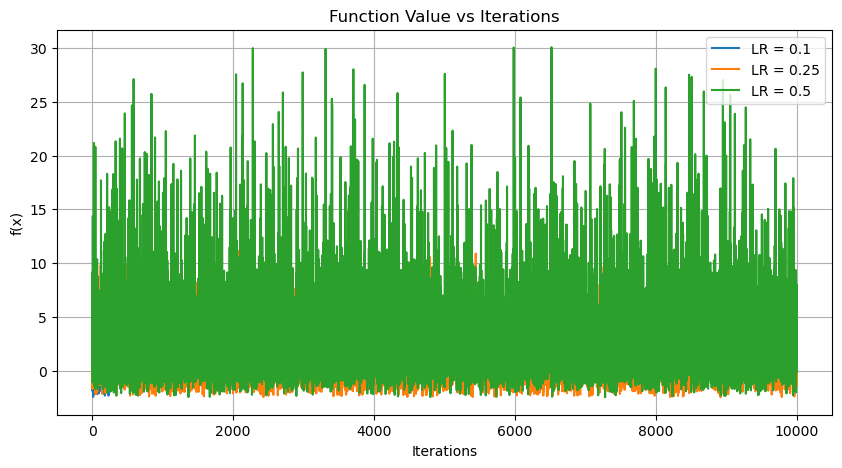

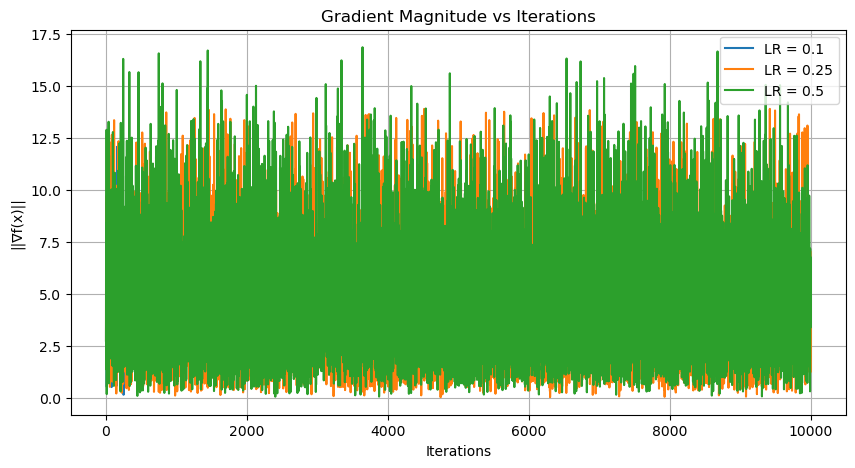

In [57]:
#for plotting all the results together
f_results = {}
grad_results = {}


for lr in learning_rates:
    f_vals, grad_vals = gradient_descent_fixed(f_structured, grad_structured, x_init, lr)
    f_results[lr] = f_vals
    grad_results[lr] = grad_vals

# Function Value Plot   
plt.figure(figsize=(10, 5))
for lr in learning_rates:
    plt.plot(f_results[lr], label=f"LR = {lr}")
plt.title("Function Value vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# Gradient Norm Plot
plt.figure(figsize=(10, 5))
for lr in learning_rates:
    plt.plot(grad_results[lr], label=f"LR = {lr}")
plt.title("Gradient Magnitude vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("||∇f(x)||")
plt.legend()
plt.grid(True)
plt.show()

Did not converge even after maximum iterations for learning rate 0.1
Final position: [6.78484363 0.01625747], Function value: 0.728026288991207


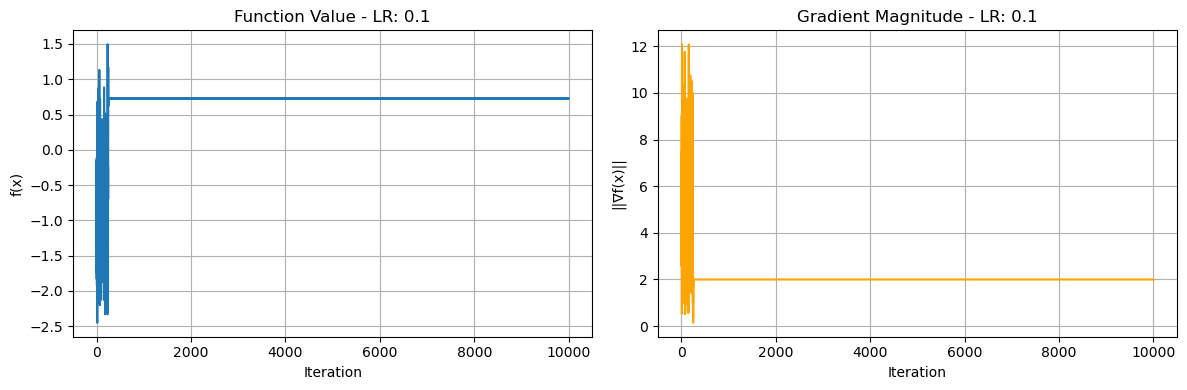

Did not converge even after maximum iterations for learning rate 0.25
Final position: [172.49409373  -0.78280053], Function value: 0.6632554035434174


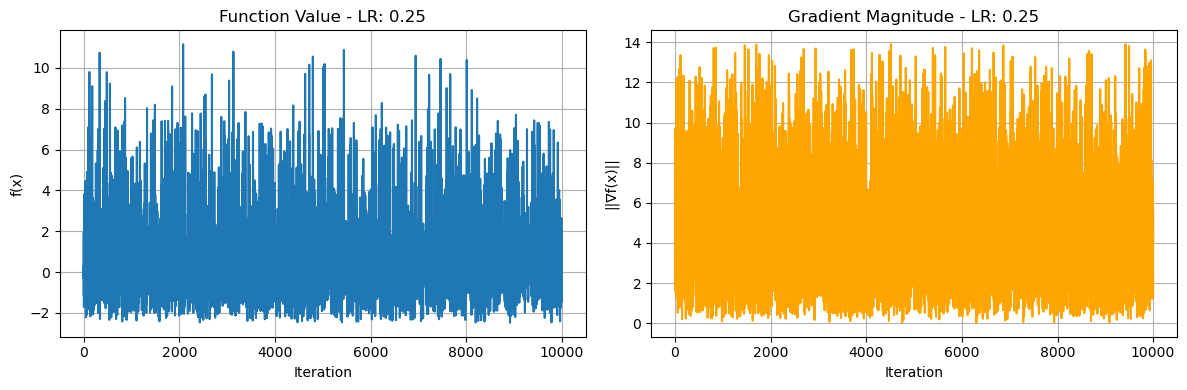

Did not converge even after maximum iterations for learning rate 0.5
Final position: [272.13057492   1.87041725], Function value: 4.526534143219114


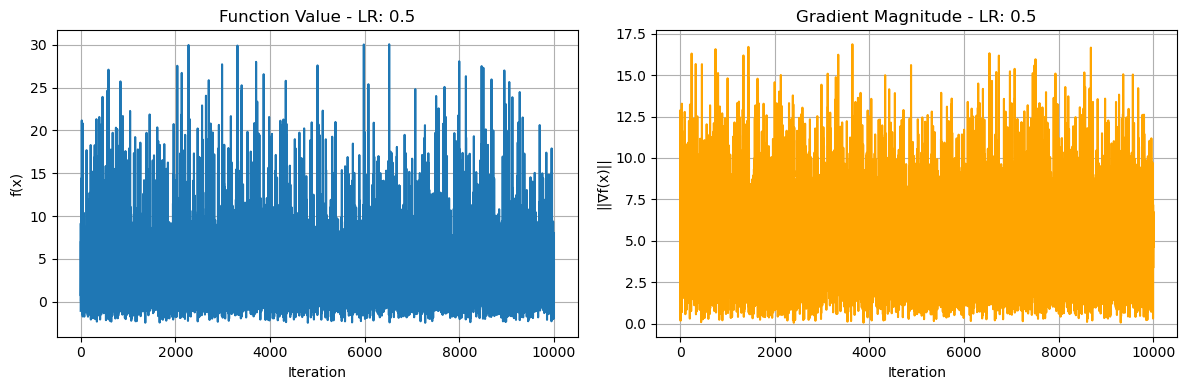

In [59]:
#for plotting side-by-side subplots for EACH learning rate
for lr in learning_rates:
    f_vals, grad_norms = gradient_descent_fixed(f_structured, grad_structured, x_init, learning_rate=lr)
    
    # Plotting side-by-side subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    axs[0].plot(f_vals)
    axs[0].set_title(f"Function Value - LR: {lr}")
    axs[0].set_xlabel("Iteration")
    axs[0].set_ylabel("f(x)")
    axs[0].grid(True)

    axs[1].plot(grad_norms, color='orange')
    axs[1].set_title(f"Gradient Magnitude - LR: {lr}")
    axs[1].set_xlabel("Iteration")
    axs[1].set_ylabel("||∇f(x)||")
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()
